# Predicting Customer Churn with Machine Learning

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank. 

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set. Additionally, measure the AUC-ROC metric and compare it with the F1.
Data source: https://code.s3.yandex.net/datasets/Churn.csv

##### Business Statement

One of the key business metrics (along with cash flow etc.) for banks, internet providers, pay TV companies, telecom companies is customer attrition analysis (or customer churn analysis). We say customer churn is loss of clients or customers. It is cheaper to keep existing customers than go for new ones. Beta bank have already seen the effect of customer churn as it affects their end of the year revenue and monthly recurring revenue (or MRR). To this end, we need to predict whether a customer will leave a bank soon given their past relationship and behavior while operating with Beta bank. The bank hopes to deploy churn prediction models and effective retention strategies in managing customer attrition thereby preventing significant loss of revenue from defecting customers.

##### Task Statement

Using the customer data, train a model that predicts whether a customer will leave the bank soon.

## Data description

The data can be found in '/datasets/Churn.csv' file. Download the dataset. 

**Features**

 - `RowNumber` — data string index
 - `CustomerId` — unique customer identifier
 - `Surname` — surname
 - `CreditScore` — credit score
 - `Geography` — country of residence
 - `Gender` — gender
 - `Age` — age
 - `Tenure` — period of maturation for a customer’s fixed deposit (years)
 - `Balance` — account balance
 - `NumOfProducts` — number of banking products used by the customer
 - `HasCrCard` — customer has a credit card
 - `IsActiveMember` — customer’s activeness
 - `EstimatedSalary` — estimated salary

**Target**

 - `Exited` — сustomer has left

## Objectives

The objectives of this project is to:
- Develop a model that would predicts whether a customer will leave the bank soon
- Build a machine learning model with the maximum possible F1 score of atleast 0.59 or higher.
- Measure the AUC-ROC metric and compare it with the F1 score.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#data_preparation">Prepare the data</a></li>
        <li><a href="#feature_engineering">Feature engineering</a></li>
        <li><a href="#class_balance">Examine the balance of classes</a></li>
        <li><a href="#improve_quality">Improve the quality of the model</a></li>
        <li><a href="#investigate_models">Investigate different models quality</a></li>
        <li><a href="#check_quality">Check model quality</a></li>
        <li><a href="#sanity_check">Sanity check the model</a></li>
        <li><a href="#overall_conclusion">Overall conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *Scikit-Learn* for building our learning algorithms

In [89]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
import random

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# import train_test_split to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from sklearn.ensemble import AdaBoostClassifier # import adaboost classifier algorithm

# import metrics for sanity check on model
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# import sklearn utilities
from sklearn.utils import shuffle

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [35]:
# read the data
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
except:
    df = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Supervised Learning/Churn.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [36]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [37]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory u

None

----------------------------------------------------------------------------------------------------
Describe:



,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


----------------------------------------------------------------------------------------------------


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457



Columns with nulls:
Column Tenure has 9.0900% percent of Nulls, and 909 of nulls
There are 1 columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(10000, 14)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




**Conclusion**

From the information about the dataset, we have 10000 rows and 14 features. Looking at the dataset, we can see that about 9% of the data is missing in the `Tenure` column. We should also note that the missing values are *missing at random (MAR)*. To handle this missing values, we could either drop them entirely since the percentage of missing values is less than 10% or replace by the median of the column. Also, we need to correct the datatype from float to int in the `Tenure`, `Balance` and `EstimatedSalary` columns.  

<div id="data_preparation">
    <h2>Prepare the data</h2> 
</div>

#### Processing Missing Values

##### Prepare `Tenure` column

To replace missing values in the `Tenure` column, we first get the unique values of `Surname`, then get the list of possible `Tenure` for those names. We then choose a random value from the list (excluding the nan values) and assign that to the missing tenure for that surname in the dataframe. For unique surname with an empty list, we use the median of the value in the `Tenure` column.

In [38]:
# replace missing values in the Tenure column
# get unique values of name from this dataframe
for surname in df['Surname'].unique().tolist():
    # get specific 'Surname' possible Tenure
    specific_surname_df = df[df['Surname'] == surname].dropna()['Tenure']
    surname_tenure_list = specific_surname_df.unique().tolist()
    # for the missing values, assign a random choice of the tenure for that surname. The default is the median of the 'Tenure'
    if surname_tenure_list != []:
        df.loc[(df['Surname'] == surname) & (df['Tenure'] != df['Tenure']), 'Tenure'] = random.choice(surname_tenure_list)
    else:
        df.loc[(df['Surname'] == surname) & (df['Tenure'] != df['Tenure']), 'Tenure'] = df['Tenure'].median()

We have replaced missing values in the `Tenure` column based on the condition we specified. Let's look at the statistics of the dataframe.

In [39]:
# check the statistics of the new dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.015900,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.884559,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
# re-check for missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
# convert data to the correct data type
def convert_to_type(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
convert_to_type(df, ['Surname', 'Geography', 'Gender'], str)
convert_to_type(df, ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], 'int64')
convert_to_type(df, ['Balance', 'EstimatedSalary'], float)

In [42]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Now we don't have any missing values and we have changed the datatype in the dataset. Replacing the missing values seems like a better option than dropping the columns with missing values. Care should be taken when replacing missing values. We don't want to create bias or variance in our dataset. The data has been cleaned and so it is ready for feature engineering and machine learning. 

<div id="feature_engineering">
    <h2>Feature engineering</h2> 
</div>

#### Feature preparation

In this section, we carry out feature engineering and one-hot encoding for the categorical features. We will use one-hot encoding to transform categorical features to numerical features. To do that we have to first create dummy variable and then apply one-hot encoding for categorical features

In [44]:
# one-hot encoding of categorical features
df_ohe = pd.get_dummies(df, drop_first=True) 
    
# declare variables for features and target
target = df_ohe['Exited']
features = df_ohe.drop(['RowNumber', 'Exited'], axis=1)
    
# split data into training and testing 
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345
)
# split train data into validation and train 
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345
) # 0.25 * 0.80 = 0.20 for validation size
    
# display the shape of the split dataset
print('The train set now contains {}'.format(features_train.shape[0]) + ' observations representing 60% of the data') 
print('The valid set now contains {}'.format(features_valid.shape[0]) + ' observations representing 20% of the data')
print('The test set now contains {}'.format(features_test.shape[0]) + ' observations representing 20% of the data')
print()

# numeric features in dataset
numeric = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# features scaling
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# transform the training set and the validation set using transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]  = scaler.transform(features_valid[numeric])
features_test[numeric]  = scaler.transform(features_valid[numeric])
    
print("\033[1m" + 'Shape of features and target' + "\033[0m")
print('-'*30)
print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Valid features :',features_valid.shape)
print('Valid target   :',target_valid.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)
print()
display(features_train.head())

The train set now contains 6000 observations representing 60% of the data
The valid set now contains 2000 observations representing 20% of the data
The test set now contains 2000 observations representing 20% of the data

Shape of features and target
------------------------------
Train features : (6000, 2943)
Train target   : (6000,)
Valid features : (2000, 2943)
Valid target   : (2000,)
Test features  : (2000, 2943)
Test target    : (2000,)



,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abbie,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
492,-0.912805,-0.134048,-0.078068,-0.358372,0.076163,0.816929,-1.550255,0.968496,0.331571,0,...,0,0,0,0,0,0,0,0,0,0
6655,0.191250,-1.010798,0.494555,1.715473,0.136391,-0.896909,0.645055,0.968496,-0.727858,0,...,0,0,0,0,0,0,0,0,0,1
4287,-0.450073,0.639554,1.353490,-1.395294,0.358435,-0.896909,0.645055,0.968496,-0.477006,0,...,0,0,0,0,0,0,0,1,0,1
42,-0.028151,-0.990168,2.116987,-1.049653,0.651725,-0.896909,0.645055,0.968496,-0.100232,0,...,0,0,0,0,0,0,0,0,0,0
8178,1.660092,0.567351,0.685430,0.678550,0.813110,0.816929,0.645055,0.968496,0.801922,0,...,0,0,0,0,0,0,0,0,0,0


**Conclusion**

We encoded the categorical feature using one-hot encoding. By now, we have a lot of data from the one-hot encoding process. But when data is abundant, we have a chance of falling into the dummy feature trap. If we keep the features as they are now, it will hinder the training process. We have added 2936 new features to our table from the one-hot encoding process, but their high correlation will confuse our model. To avoid this, we can safely remove any one column, since its values can be easily inferred from one of the other two columns (it has 1 where the other two columns have zeroes, and it has zeroes everywhere else). This way, we will not fall into the dummy trap. Pandas library has a function pd.get_dummies() that can be used for getting dummy variables. We split the data three ways into 60% training set, 20% validation set, and 20% testing sets. Since the features have different scales, we standardized the numerical features of the data. The size of the new table is 6000 rows and 2943 columns for the train features set, 2000 rows and 2943 columns for the validation features set, and 2000 rows and 2943 columns for the test features set. Now the data is prepared and ready for analysis.

<div id="class_balance">
    <h2>Examine the balance of classes</h2> 
</div>

Here we train the model without taking into account the imbalance. 

In [53]:
# create the logistic regression model
def logistic_regression(X_train, y_train, X_valid, y_valid):
    """
    This is a logistic regression model function developed to train
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets
    """
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) # train the model 
    model.score(X_train, y_train) # check the model's accuracy with score() method
    train_predictions = model.predict(X_train) # make predictions on train set
    predicted_valid = model.predict(X_valid) # make predictions on validation set
    print('Accuracy for logistic regression model')
    print('-'*40)
    print('Training set:', accuracy_score(y_train, train_predictions))
    print('Validation set:', accuracy_score(y_valid, predicted_valid))
    print()
    print('F1 score for logistic regression model')
    print('-'*35)
    print('F1 score: {:.3f}'.format(f1_score(y_valid, predicted_valid)))

In [54]:
# determine accuracy for logistic regression model
logistic_regression(features_train, target_train, features_valid, target_valid)

Accuracy for logistic regression model
----------------------------------------
Training set: 0.846
Validation set: 0.807

F1 score for logistic regression model
-----------------------------------
F1 score: 0.308


0    0.9165
1    0.0835
dtype: float64


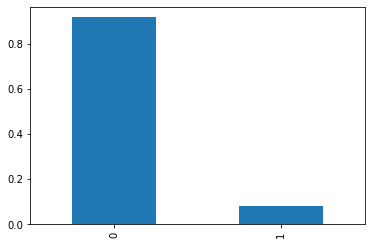

In [59]:
# sanity check
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train) # train the model 
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

In this section, we trained the model without taking into account the imbalance. We achieved an accuracy of 0.807 on the validation set and an F1 score of 0.308. We assess the sanity of the model by checking how often the target feature contains the class "1" or "0". We can observe the class imbalance in the predicted validation set. Next we try to improve the quality of the model using two different approaches to fixing class imbalance. 

<div id="improve_quality">
    <h2>Improve the quality of the model</h2> 
</div>

We apply two different approaches to fix the class imbalance.
- Class weight adjustment
- Upsampling

##### Using Class Weight Adjustment

In [84]:
# class weight adjustment
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 score with adjusted class weight: {:.3f}'.format(f1_score(target_valid, predicted_valid)))

F1 score with adjusted class weight: 0.449


0    0.6835
1    0.3165
dtype: float64


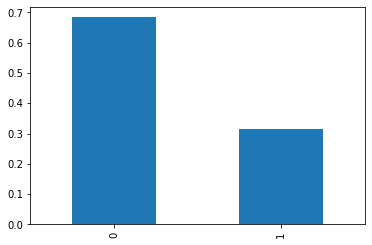

In [86]:
# sanity check after class imbalance
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Here, we made the rare classes weigh more by specifying `class_weight='balanced'`. Notice how the F1 score improved to $\approx$ 0.45. This is what class weight adjustment can achieve.

##### By Upsampling

In [81]:
# function to perform upsampling 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

# new training set created
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5
)

In [82]:
# F1 score after upsampling 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1 score after upsampling: {:.3f}'.format(f1_score(target_valid, predicted_valid)))

F1 score after upsampling: 0.430


First, we split the training sample into negative and positive observations, we duplicated the positive observations and combine them with the negative class observation. Then we shuffled the data using `shuffle()` function, and trained our *LogisticRegression* model with the new data. We calculated the F1 score to be 0.43.

<div id="investigate_models">
    <h2>Investigate different models quality</h2> 
</div>

#### Hyperparameter Tuning

##### Decision Tree Classifier

For the decision tree classifier, we iterate over different values and compare the quality of the model by tuning the `max_depth` hyperparameter.

In [185]:
# create the decision tree classifier
def decision_tree_classifier(X_train, y_train, X_valid, y_valid):
    """
    This is a decision tree classifier function developed to train  
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets and plot model 
    accuracy scores on train and validation sets for visual comparison
    """
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the tree depth
    tree_depth = [i for i in range(1, 21)]
    # create a loop for max_depth from 1 to 21
    for depth in tree_depth:
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # create an instance of a class
        model.fit(X_train, y_train) # train the model
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
    scores = list(zip(tree_depth, train_scores, valid_scores))
    print('The validation score with the best accuracy occured at' "\033[1m" + ' tree depth {}'.format(max(scores, key = lambda x: x[2])[0]) + "\033[0m" +
          ' with an accuracy of ' "\033[1m" + '{:.2%}'.format(max(scores, key = lambda x: x[2])[1]) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[2])[2]) + ' for the validation set' + "\033[0m")
    # plot of train and validation scores vs tree depth
    plt.figure(figsize=(10,6))
    plt.plot(tree_depth, train_scores, '-*', label='Train')
    plt.plot(tree_depth, valid_scores, '-o', label='Validation')
    plt.title('Plot of train and validation scores vs tree depth')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

The validation score with the best accuracy occured at tree depth 6 with an accuracy of 86.80% for the training set and 85.80% for the validation set
F1 score: 0.449


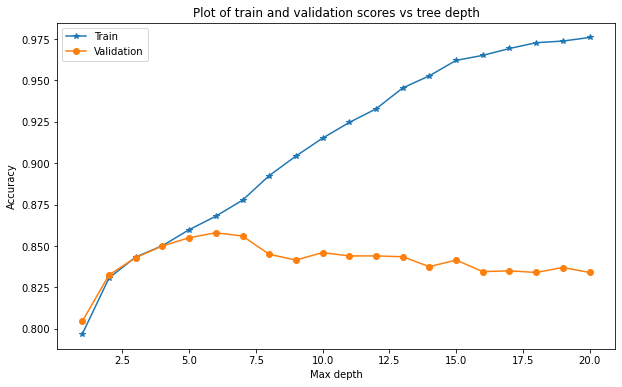

In [186]:
# determine accuracy for decision tree classifier
decision_tree_classifier(features_train, target_train, features_valid, target_valid)

We created a loop for `max_depth` hyperparameter from 1 to 20 to see what depth gives us the best fit. We note that shallow decision trees (e.g. few depth) generally do not overfit but have poor performance (high bias, low variance), and deep trees (e.g. high depth) generally do overfit and have good performance (low bias, high variance). Our desirable tree depth is one that is not so shallow that it has low performance and not so deep that it overfits the training dataset. We need to have a balance between bias and variance - bias variance tradeoff. We plot the model accuracy scores on the train and validation sets to visualize this. Notice how the accuracy of the validation test keeps increasing until it gets to `max_depth` of 6. After this depth, the accuracy starts to decline. At `max_depth` of 6, we have an accuracy of 86.80% for the training set, and 85.80% for the validation set. We choose a tree depth of 6 before the model begins to overfit the training dataset. 

##### Logistic Regression Model

In [187]:
# create the logistic regression model
def logistic_regression(X_train, y_train, X_valid, y_valid):
    """
    This is a logistic regression model function developed to train
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets
    """
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define parameter "C" values
    c_values = [100, 10, 1.0, 0.1, 0.01]
    # create a for loop to loop through each C parameter values
    for c_parameter in c_values:
        model = LogisticRegression(random_state=12345, C=c_parameter, solver='liblinear')
        model.fit(X_train, y_train) # train the model 
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
    scores = list(zip(c_values, train_scores, valid_scores))
    print('The validation score with the best accuracy occured using' "\033[1m" + ' C parameter of {}'.format(max(scores, key = lambda x: x[2])[0]) + "\033[0m" +
          ' with an accuracy of ' "\033[1m" + '{:.2%}'.format(max(scores, key = lambda x: x[2])[1]) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[2])[2]) + ' for the validation set' + "\033[0m")

In [188]:
# determine accuracy for logistic regression model
logistic_regression(features_train, target_train, features_valid, target_valid)

The validation score with the best accuracy occured using C parameter of 0.1 with an accuracy of 82.03% for the training set and 81.35% for the validation set
F1 score: 0.449


We tuned the "C" parameter for the logistic regression model. Although the model training is fast, the accuracy is lower. The logistic regression model gave an accuracy of 82.03% for the training set, and 81.35% for the validation sets when using a "C" parameter of 0.1. We can see here that neither the training nor the validation score is high enough. This is because the model is not complex enough hence underfitting occurs. Let's see how other model behave before deciding on the model to use.

##### AdaBoostClassifier

In [191]:
def adaboost_classifier(X_train, y_train, X_valid, y_valid):
    """
    This is an Adaboost classifier function developed to train
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets
    """
    model = AdaBoostClassifier(random_state=12345, n_estimators=5)
    model.fit(X_train, y_train) # train the model 
    model.score(X_train, y_train) # check the model's accuracy with score() method
    train_predictions = model.predict(X_train) # make predictions on train set
    predictions_valid = model.predict(X_valid) # make predictions on validation set
    print('Accuracy for Adaboost classifier')
    print('-'*40)
    print('Training set:', accuracy_score(y_train, train_predictions))
    print('Validation set:', accuracy_score(y_valid, predictions_valid))

In [192]:
# determine accuracy for adaboost classifier
adaboost_classifier(features_train, target_train, features_valid, target_valid)

Accuracy for Adaboost classifier
----------------------------------------
Training set: 0.8525
Validation set: 0.856


##### Random Forest Classifier

In [193]:
# create the random forest classifier model
def random_forest_classifier(X_train, y_train, X_valid, y_valid):
    """
    This is a random forest classifier function developed to train
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets and visualize
    model accuracy scores on train and validation sets
    """
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the n_estimator range
    estimator_depth = [i for i in range(1, 21)]
    # create a loop for n_estimator from 1 to 21
    for estimator in estimator_depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator)
        model.fit(X_train, y_train) # train the model 
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
    scores = list(zip(estimator_depth, train_scores, valid_scores))
    print('The validation score with the best accuracy occured using' "\033[1m" + ' n_estimator of {}'.format(max(scores, key = lambda x: x[2])[0]) + "\033[0m" +
          ' with an accuracy of ' "\033[1m" + '{:.2%}'.format(max(scores, key = lambda x: x[2])[1]) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[2])[2]) + ' for the validation set' + "\033[0m")

In [194]:
# determine accuracy for random forest classifier
random_forest_classifier(features_train, target_train, features_valid, target_valid)

The validation score with the best accuracy occured using n_estimator of 16 with an accuracy of 99.10% for the training set and 85.35% for the validation set


##### Stochastic Gradient Boosting (XGBoost)

**Conclusion**

From the investigation of different model quality, we can see that at `n_estimators` value of 10, the random forest gives an accuracy of 98.0% for the training data, and 78.80% for the validation data. The logistic regression model was the least accurate model with an accuracy of 70.28% for the training set, and about 69.98% for the validation sets. We proceed to use the random forest classifier to test prediction on the unseen test data.

<div id="check_quality">
    <h2>Check model quality</h2> 
</div>

<div id="sanity_check">
    <h2>Sanity check the model</h2> 
</div>

In [ ]:
# sMAPE 
# def smape(actual, predicted):
#     dividend= np.abs(np.array(actual) - np.array(predicted))
#     denominator = np.array(actual) + np.array(predicted)
    
#     return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))

# def print_metrics(y_test, y_pred):
#     print("RMSE: %.4f" % sqrt(mean_squared_error(y_test, y_pred)))
#     print('Variance score: %.4f' % r2_score(y_test, y_pred))
#     print('Explained variance score: %.4f' % explained_variance_score(y_test, y_pred))
#     forecast_err = np.array(y_test) - np.array(y_pred)
#     print('Forecast bias: %.4f' % (np.sum(forecast_err) * 1.0/len(y_pred) ))
#     print('sMAPE: %.4f' % smape(y_test, y_pred))

<div id="overall_conclusion">
    <h2>Overall conclusion</h2> 
</div>